In [1]:
import os

# Train test Splitting

The images cant be splitted in random, because there are images similar with each other, so we need to split them in order

In [3]:
imagesPath = os.path.join("data", "images")
masksPath = os.path.join("data", "masks")

In [5]:
images = os.listdir(imagesPath)
masks = os.listdir(masksPath)

In [8]:
len(images) == len(masks), len(masks)
# checking if the length there are the same number of images and masks 

(True, 2615)

In [10]:
testSize = len(images) * 5 // 100
testSize

130

In [14]:
testImages = images[len(images) - testSize:]
testMasks = images[len(masks) - testSize:]

In [15]:
testImagePath = os.path.join("testData", "images")
testMaskPath = os.path.join("testData", "masks")

os.makedirs(testImagePath, exist_ok=True)
os.makedirs(testMaskPath, exist_ok=True)

def moveTestImages():
    for image, mask in zip(testImages, testMasks):
        sourceImagePath = os.path.join(imagesPath, image)
        sourceMaskPath = os.path.join(masksPath, mask)
        destinationImagePath = os.path.join(testImagePath, image)
        destinationMaskPath = os.path.join(testMaskPath, mask)
        os.rename(sourceImagePath, destinationImagePath)
        os.rename(sourceMaskPath, destinationMaskPath)

In [ ]:
# moveTestImages()
# commented this out to avoid accident running 

# Previewing some images

In [ ]:
import matplotlib.pyplot as plt
import random

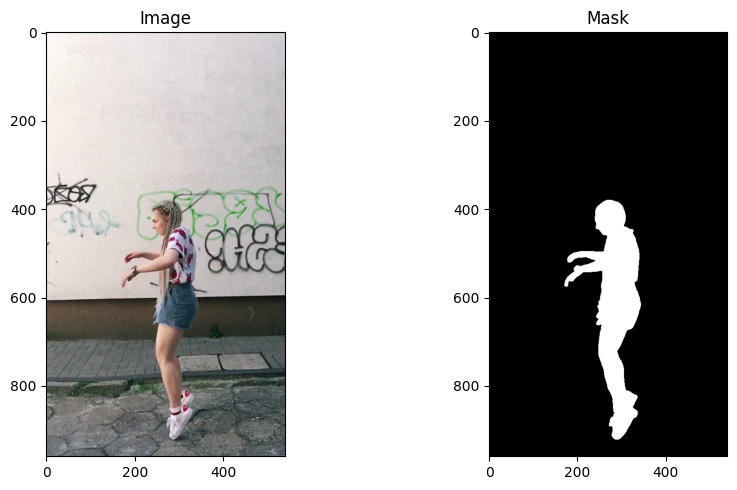

In [117]:
idx = random.randint(0, len(testImages))
rndImg = os.path.join(testImagePath, testImages[idx])
rndMask = os.path.join(testMaskPath, testMasks[idx])
img = plt.imread(rndImg)
msk = plt.imread(rndMask, "L")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Image')

# Display the second image
plt.subplot(1, 2, 2)
plt.imshow(msk)
plt.title('Mask')

# Show the plot
plt.tight_layout()
plt.show()

# Image loading pipeline

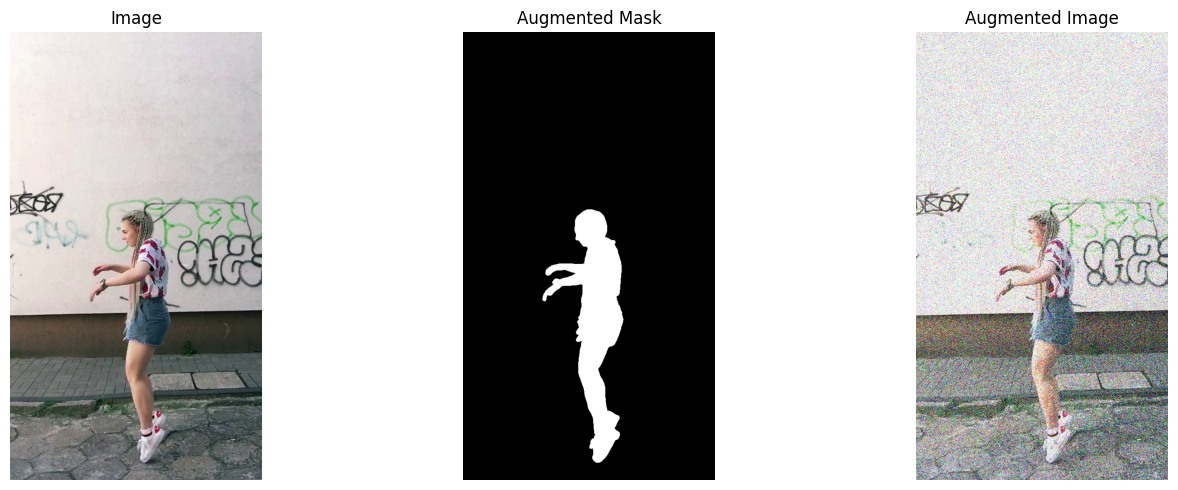

In [183]:
import albumentations as A

augmentation_pipeline = A.Compose([
    # Geometric transformations (applied to both image and mask)
    A.HorizontalFlip(p=0.2),
    A.VerticalFlip(p=0.2),
    A.Rotate(limit=25, p=0.65),
    A.RandomBrightnessContrast(),
    A.RandomFog(),
    A.MotionBlur(3, p=0.2),
    A.GaussianBlur(3, p=0.3),
    A.GaussNoise((0, 0.3))
], additional_targets={'mask': 'mask'})  

# Apply augmentations
augmented = augmentation_pipeline(image=img, mask=msk)
augmented_image = augmented['image']
augmented_mask = augmented['mask']

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
plt.imshow(augmented_image)
plt.axis("off")
plt.title('Augmented Image')

# Display the second image
plt.subplot(1, 3, 2)
plt.imshow(augmented_mask)
plt.axis("off")
plt.title('Augmented Mask')

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis("off")
plt.title('Image')

# Show the plot
plt.tight_layout()
plt.show()
